# London Housing and Population Analysis (2002 - 2015 data)

## 10. Focus Boroughs EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
changes_df = pd.read_csv('..raw_data/focus_borough_changes.csv', index_col=[0])

# Confirm data set structure:
changes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 28 to 461
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   borough                   140 non-null    object 
 1   year                      140 non-null    int64  
 2   all_ages                  140 non-null    int64  
 3   minor                     140 non-null    int64  
 4   18_24                     140 non-null    int64  
 5   25_34                     140 non-null    int64  
 6   35_44                     140 non-null    int64  
 7   45_54                     140 non-null    int64  
 8   55_64                     140 non-null    int64  
 9   65+                       140 non-null    int64  
 10  houses_sold               140 non-null    int64  
 11  average_price             140 non-null    int64  
 12  all_ages_change           130 non-null    float64
 13  all_ages_pct_change       130 non-null    float64
 14  minor_cha

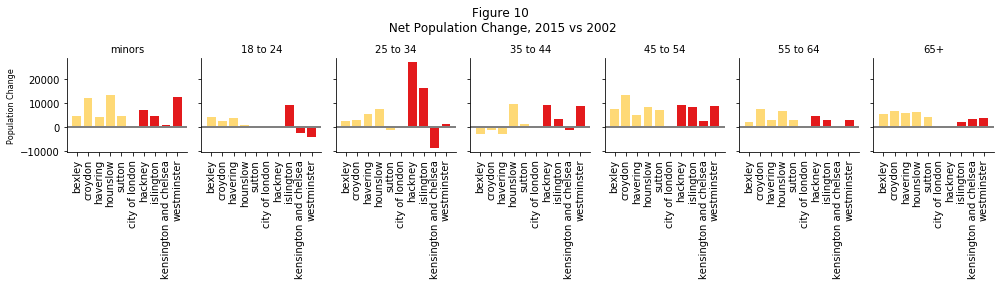

In [3]:
# Explore changes in population by age bracket:
age_changes = changes_df.groupby(['borough'])[['minor_change', '18_24_change', '25_34_change', '35_44_change', 
'45_54_change','55_64_change', '65+_change']].sum(numeric_only=True).unstack(level=0).reset_index()

age_changes = age_changes.rename(columns={'level_0': 'age_band', 0: 'net_pop_change'})
age_changes.replace(to_replace=['minor_change', '18_24_change', '25_34_change', '35_44_change', '45_54_change',
 '55_64_change', '65+_change'], value=['minors', '18 to 24', '25 to 34', '35 to 44', '45 to 54', 
 '55 to 64', '65+'], inplace=True)

# Show change visually:
# Colour steeps red, slights yellow:
steeps = ['westminster', 'kensington and chelsea', 'city of london', 'hackney', 'islington']
slights = ['hounslow', 'bexley', 'sutton', 'havering', 'croydon']
age_changes.loc[age_changes['borough'].isin(steeps), 'rank'] = 'steep'
age_changes.loc[age_changes['borough'].isin(slights), 'rank'] = 'slight'
pal = {'steep': '#e31a1c', 'slight': '#fed976'}

# 1) Show net population change per age bracket:
g = sns.FacetGrid(age_changes, col='age_band', hue ='rank', palette=pal, col_wrap=7,  height=4, aspect=.5)
g = g.map(plt.bar, 'borough', 'net_pop_change')
g = g.map(plt.axhline, y=0, color='grey', linewidth=2)
g = g.set_titles('{col_name}')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

font = {'size': 8}
g = g.set_ylabels('Population Change', fontdict=font)
g = g.fig.suptitle('Figure 10\n Net Population Change, 2015 vs 2002')
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.savefig('../images/Fig10_net_pop_change_by_age_band.png')
plt.show()

The biggest changes are in the minors and 25-34 year olds.  

Price hikes, however, cannot be explained by these population changes alone:   
Hackney follows the increasing population trends in these ages but Kensington and Chelsea defies them, showing the biggest decrease in 25-34 year olds out of the 10 focus boroughs.


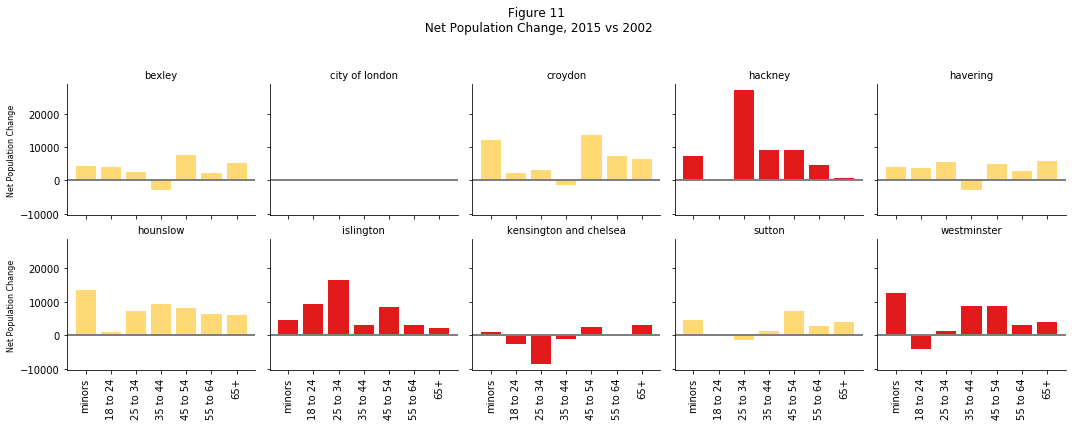

In [4]:
# 2) Show net population change per borough:
g2 = sns.FacetGrid(age_changes, col='borough', hue ='rank', palette=pal, col_wrap=5,)
g2 = g2.map(plt.bar, 'age_band', 'net_pop_change')
g2 = g2.map(plt.axhline, y=0, color='grey', linewidth=2)
g2 = g2.set_titles('{col_name}')
for ax in g2.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
g2.set_ylabels('Net Population Change', fontdict=font)
g2 = g2.fig.suptitle('Figure 11\n Net Population Change, 2015 vs 2002')
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.savefig('../images/Fig11_net_pop_change_by_borough.png')
plt.show()

Seeing the data in this format makes it even more noticeable that City of London's population is almost stagnant, yet we know prices there increased significantly.  Obvious also is that Kensington and Chelsea's population also varied only slightly, although it held its rank as the most consistently expensive borough across the period.  

We cannot therefore say that population change is a clear driver of house prices.


Setting City of London aside, notably the only age group where population is up across the 9 focus boroughs is 45-54 (visible in Fig10).  
Could this be prime house-buying age?  
In absolute numbers, "slight" boroughs show a bigger increase in 45-54 year olds but is this the case in relative percentage terms?

In [5]:
# Determine whether percentage change in 45-54 populations is a better indicator of house price rises:

# (2015 as a percentage of 2002 populations)
gen_x_start = changes_df[['borough','45_54']][changes_df['year'] == 2002].reset_index()
gen_x_start = gen_x_start.rename(columns={'45_54': '2002'})
gen_x_start.drop(columns='index', axis=1, inplace=True)

gen_x_end = changes_df[['borough','45_54']][changes_df['year'] == 2015].reset_index()
gen_x_end = gen_x_end.rename(columns={'45_54': '2015'})
gen_x_end.drop(columns='index', axis=1, inplace=True)

gen_x_change = pd.merge(gen_x_start, gen_x_end, on='borough')
gen_x_change['gen_x_pct_change'] = 100* gen_x_change['2015'] / gen_x_change['2002']
gen_x_change_visual = gen_x_change[['borough', 'gen_x_pct_change']].sort_values(by='gen_x_pct_change', ascending=False).to_markdown()
print("Figure 13\n\n", gen_x_change_visual)

Figure 13

 |    | borough                |   gen_x_pct_change |
|---:|:-----------------------|-------------------:|
|  6 | islington              |            147.034 |
|  3 | hackney                |            144.162 |
|  9 | westminster            |            139.183 |
|  2 | croydon                |            132.915 |
|  8 | sutton                 |            132.341 |
|  5 | hounslow               |            131.886 |
|  0 | bexley                 |            126.73  |
|  1 | city of london         |            119.189 |
|  4 | havering               |            116.504 |
|  7 | kensington and chelsea |            112.728 |


The biggest percentage changes in this age group are found in boroughs with the most steep rises in prices over the period.  Nonetheless, Kensington and Chelsea continues to buck this trend with the lowest percentage change in Generation X population.  To confirm whether there is a weak correlation between increase in generation x population and increase in house sales and prices, we should return to considering all 33 London boroughs.